In [18]:
import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd
import os
import seaborn as sns

In [ ]:
import numpy as np
A = np.array([[[0, 0], [1, 1]], [[0, 0], [0, 1]], [[1, 1], [1, 1]]])

In [37]:
argument = dict()
argument['pred_dir'] =  '/workspace/data/UC1/L2_minicubes/prediction/en22/'
argument['architecture'] = ['local-rn', 'context-convlstm/']
argument['path_setting'] = 'experiments/en22/'
argument['track'] = 'iid'
argument['models'] = ['context-convlstm/baseline_convlstm_without_normalisation', 'context-convlstm/baseline_input_topo_and_NDVI', 'context-convlstm/baseline_input_topo_ndvi_weather']

# Disabling PyTorch Lightning automatic SLURM detection
for k, v in os.environ.items():
    if k.startswith("SLURM"):
        del os.environ[k]

In [39]:
def datasets_rmse(args):
    scores_models = []
    for model in args['models']:
        file = args['pred_dir']  + model + '/individual_scores.json'
        with open(file) as f:
            lst = json.load(f)

        scores_models.append([score['rmse'] for score in lst if not np.isnan(score['rmse'])])# != 'nan'])

    data = pd.DataFrame(scores_models, index=['NDVI', 'NDVI and topology', 'NDVI, topology, weather'])
    
    return scores_models



0.1462270508318325 0.12025121302386514 0.1113516291454036


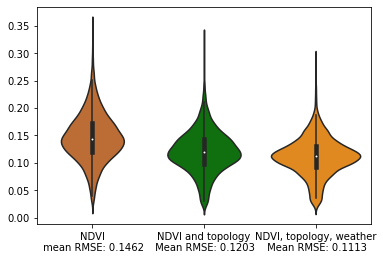

In [46]:
data = datasets_rmse(argument)
print(np.mean(data[0]), np.mean(data[1]), np.mean(data[2]))
ax = sns.violinplot(data=data, palette=['chocolate', 'green', 'darkorange'])
ax.set_xticklabels(['NDVI\n mean RMSE: 0.1462','NDVI and topology\n Mean RMSE: 0.1203', 'NDVI, topology, weather\n Mean RMSE: 0.1113'])
plt.savefig('comparaison_input.png')

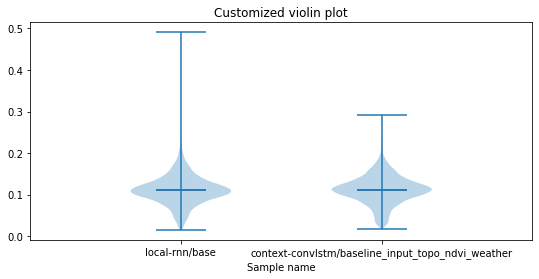

In [16]:
def adjacent_values(vals, q1, q3):
    
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')


# create test data
#data = [sorted(np.random.normal(0, std, 100)) for std in range(1, 5)]
data = sorted(datasets_rmse(argument))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 4)) #, sharey=True)

ax.set_title('Customized violin plot')
parts = ax.violinplot(
        data, showmeans=True, showmedians=True,
        showextrema=True)

# color 
'''for pc in parts['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(1)'''

'''quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1)

whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(1, len(medians) + 1)
ax.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
ax.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)'''

# set style for the axes
labels = argument['models']

set_axis_style(ax, labels)

# plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()

In [2]:
import matplotlib.pyplot as plt
import numpy as np


# create test data
#data = [sorted(np.random.normal(0, std, 100)) for std in range(1, 5)]
data = sorted(datasets_rmse(argument))
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(9, 4)) #, sharey=True)

ax1.set_title('Default violin plot')
ax1.set_ylabel('Observed values')
ax1.violinplot(data)

plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()

NameError: name 'datasets_rmse' is not defined